# SETUP

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections as collections 
import os

from collections import Counter    
from mlxtend.frequent_patterns import apriori, association_rules

import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

anime = pd.read_csv('anime_with_genre_separated.csv')
users = pd.read_csv('users_cleaned_with_location.csv')
anime_list = pd.read_csv('animelists_cleaned.csv')


In [16]:
anime

,Unnamed: 0,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,...,Demons,Game,Sci-Fi,Shounen,Seinen,Horror,Cars,Kids,Mystery,Mecha
0,0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,...,0,0,0,1,0,0,0,0,0,0
1,1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,...,0,0,0,1,0,0,0,0,0,0
2,2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,...,0,0,0,0,0,0,0,0,0,0
3,3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,...,0,0,0,0,0,0,0,0,0,0
4,4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,6663,37405,Dokidoki Little Ooyasan,NaN,dokidokiりとる大家さん,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,0,...,0,0,0,0,0,0,0,0,0,0
6664,6664,37886,Wo Shi Jiang Xiaobai (2018),I&#039;m Joybo OVA,我是江小白 小剧场,Wo Shi Jiang Xiao Bai: Xiao Ju Chang,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Original,1,...,0,0,0,0,0,0,0,0,0,0
6665,6665,37255,Genki Genki Non-tan: Obake Mura Meiro,NaN,げんきげんきノンタン おばけむらめいろ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,1,...,0,0,0,0,0,0,0,1,0,0
6666,6666,35229,Mr. Men Little Miss,Mr. Men Little Miss,Mr. Men Little Miss / ミスターメン リトルミス,NaN,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Picture book,0,...,0,0,0,0,0,0,0,1,0,0


In [123]:
anime.head()

,Unnamed: 0,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,...,Demons,Game,Sci-Fi,Shounen,Seinen,Horror,Cars,Kids,Mystery,Mecha
0,0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,...,0,0,0,1,0,0,0,0,0,0
1,1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,...,0,0,0,1,0,0,0,0,0,0
2,2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,...,0,0,0,0,0,0,0,0,0,0
3,3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,...,0,0,0,0,0,0,0,0,0,0
4,4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,...,0,0,0,1,0,0,0,0,0,0


In [124]:
anime.head().T


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
anime_id,11013,2104,5262,721,12365
title,Inu x Boku SS,Seto no Hanayome,Shugo Chara!! Doki,Princess Tutu,Bakuman. 3rd Season
title_english,Inu X Boku Secret Service,My Bride is a Mermaid,Shugo Chara!! Doki,Princess Tutu,Bakuman.
title_japanese,妖狐×僕SS,瀬戸の花嫁,しゅごキャラ！！どきっ,プリンセスチュチュ,バクマン。
...,...,...,...,...,...
Horror,0,0,0,0,0
Cars,0,0,0,0,0
Kids,0,0,0,0,0
Mystery,0,0,0,0,0


In [126]:
pd.set_option('display.max_columns', None)
anime.head()

,Unnamed: 0,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year,Ecchi,Police,Shoujo Ai,Josei,Fantasy,Action,Martial Arts,Military,Slice of Life,Harem,Music,Drama,Hentai,Yaoi,Supernatural,Thriller,Romance,Shoujo,Parody,Adventure,Magic,Psychological,School,Samurai,Historical,Sports,Vampire,Yuri,Super Power,Space,Comedy,Shounen Ai,Dementia,Demons,Game,Sci-Fi,Shounen,Seinen,Horror,Cars,Kids,Mystery,Mecha
0,0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sph

In [129]:
anime_list.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN


In [128]:
users.head()

,Unnamed: 0,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,city,country,age
0,0,karthiga,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391,NaN,india,30.0
1,1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903,detroit,united states,29.0
2,2,bskai,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701,NaN,mexico,29.0
3,3,terune_uzumaki,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24,NaN,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697,NaN,malaysia,22.0
4,4,Bas_G,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24,NaN,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847,nederland,united states,21.0


# EDA

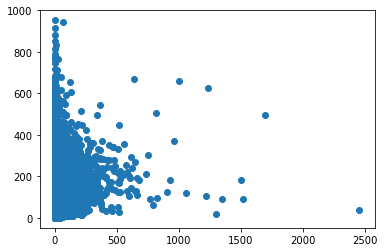

In [48]:
#How many users watch anime vs. how many anime the user dropped

user_dropped = users.user_dropped
days_anime_watched = users.user_days_spent_watching

plt.scatter(user_dropped,days_anime_watched)

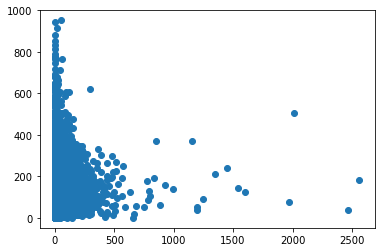

In [52]:
user_onhold = users.user_onhold
plt.scatter(user_onhold, days_anime_watched)

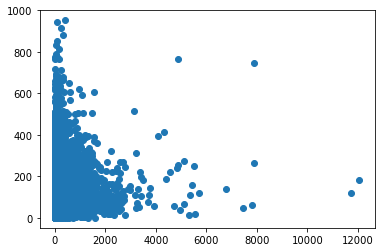

In [54]:
user_plantowatch= users.user_plantowatch
plt.scatter(user_plantowatch, days_anime_watched)

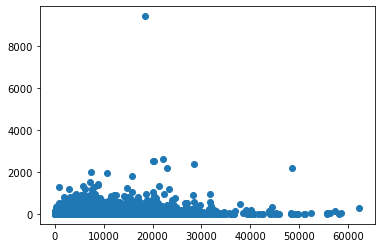

In [59]:
#number of episodes watched vs number of days anime watched 
stats_episodes = users.stats_episodes
stats_rewatched = users.stats_rewatched
plt.scatter(stats_episodes, stats_rewatched)

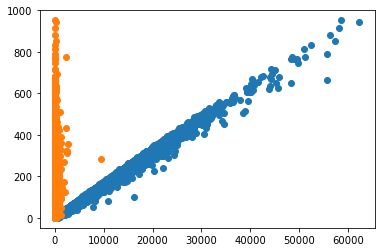

In [88]:
plt.scatter(stats_episodes, days_anime_watched)
plt.scatter(stats_rewatched, days_anime_watched)

In [89]:
#Change birthday to age and add age column 

import datetime as DT

now = pd.Timestamp('now')

users['birth_date'] = pd.to_datetime(users['birth_date'], format='%Y-%m-%d %H:%M:%S') 

users['birth_date'] = users['birth_date'].where(users['birth_date'] < now, users['birth_date'] -  np.timedelta64(100, 'Y')) 
users['age'] = (now - users['birth_date']).astype('<m8[Y]')    
print(users)

        Unnamed: 0        username  user_id  user_watching  user_completed  \
0                0        karthiga  2255153              3              49   
1                1       Damonashu    37326             45             195   
2                2           bskai   228342             25             414   
3                3  terune_uzumaki   327311              5               5   
4                4           Bas_G  5015094             35             114   
...            ...             ...      ...            ...             ...   
108706      108706          isoann   797785             14             213   
108707      108707        bumcakee  1396285             13             116   
108708      108708       Scarlet95  2478991              6             103   
108709      108709        Torasori  3975907             22             239   
108710      108710          HMicca  1289601             11              73   

        user_onhold  user_dropped  user_plantowatch  user_days_

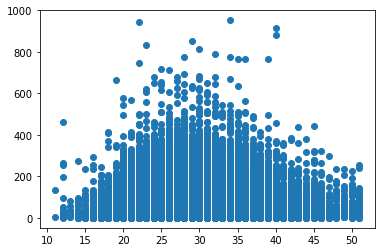

In [94]:
plt.scatter(users.age, days_anime_watched)

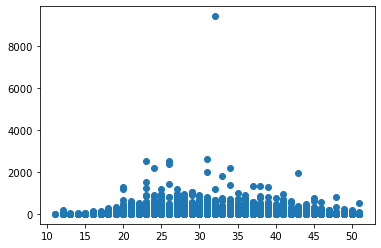

In [95]:
plt.scatter(users.age, stats_rewatched)

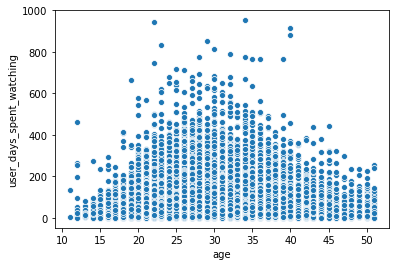

In [107]:
age = users.age

sns.scatterplot(data=users, x="age", y="user_days_spent_watching")


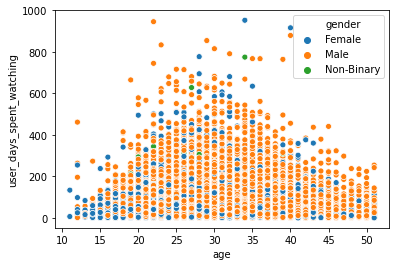

In [110]:
sns.scatterplot(data=users, x="age", y="user_days_spent_watching", hue="gender")

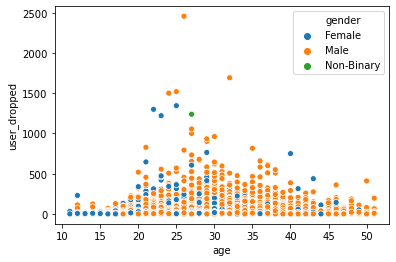

In [111]:
sns.scatterplot(data=users, x="age", y="user_dropped", hue="gender")

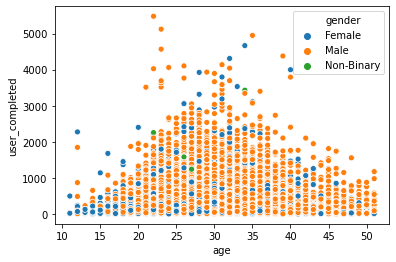

In [112]:
sns.scatterplot(data=users, x="age", y="user_completed", hue="gender")

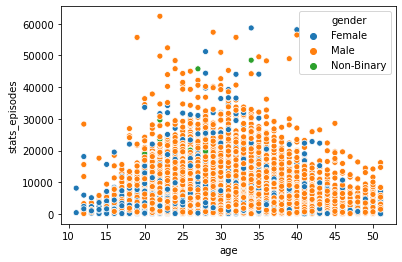

In [113]:
sns.scatterplot(data=users, x="age", y="stats_episodes", hue="gender")

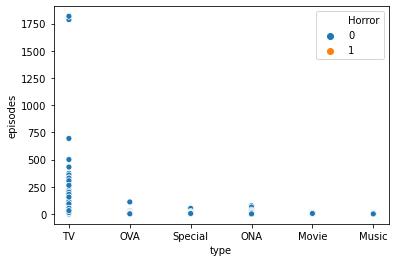

In [115]:
sns.scatterplot(data=anime, x="type", y="episodes", hue="Horror")

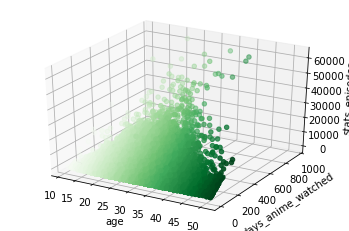

In [102]:
#3-D plotting

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(age, days_anime_watched, stats_episodes, c=age, cmap='Greens');
ax.set_xlabel('age')
ax.set_ylabel('days_anime_watched')
ax.set_zlabel('stats_episodes');

In [140]:
#Check any null values
anime_list.isnull().values.any()

True

In [148]:
anime.isnull().values.any()

True

In [150]:
users.isnull().values.any()

True

In [145]:
#Find null values
anime_list.isnull().sum()

username                    243
anime_id                      0
my_watched_episodes           0
my_start_date                 0
my_finish_date                0
my_score                      0
my_status                     0
my_rewatching           6878247
my_rewatching_ep              0
my_last_updated               0
my_tags                29290313
dtype: int64

In [151]:
anime.isnull().sum()

Unnamed: 0           0
anime_id             0
title                0
title_english     3230
title_japanese       5
                  ... 
Horror               0
Cars                 0
Kids                 0
Mystery              0
Mecha                0
Length: 77, dtype: int64

In [152]:
users.isnull().sum()

Unnamed: 0                       0
username                         1
user_id                          0
user_watching                    0
user_completed                   0
user_onhold                      0
user_dropped                     0
user_plantowatch                 0
user_days_spent_watching         0
gender                           0
location                         5
birth_date                       0
access_rank                 108711
join_date                        0
last_online                      0
stats_mean_score                 0
stats_rewatched                  0
stats_episodes                   0
city                         75436
country                      26976
dtype: int64

In [147]:
#Clean null data

anime_list.drop(['my_rewatching', 'my_tags'], axis=1)

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching_ep,my_last_updated
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,0,2013-03-03 10:52:53
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,0,2013-03-10 13:54:51
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,0,2013-04-27 16:43:35
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,0,2013-03-03 10:53:57
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0,2013-03-27 15:59:13
...,...,...,...,...,...,...,...,...,...
31284025,Yokonightcore,15611,48,2014-00-00,0000-00-00,9,1,0,2015-09-07 17:33:03
31284026,Yokonightcore,27815,22,0000-00-00,0000-00-00,9,1,0,2015-09-07 17:32:05
31284027,wargod,5945,39,0000-00-00,0000-00-00,8,2,0,2010-03-29 04:24:12
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,0,2009-12-23 05:45:14


In [188]:
#Remove rows that == null for city, country, & access_rank

users = users.dropna(axis=0, subset=['city', 'country', 'access_rank'])

In [220]:
anime_list.my_score.count()

31284030

In [221]:
anime_list.my_score.values

array([ 9,  7,  7, ...,  8,  9, 10])

In [222]:
anime_list.my_score.unique()

array([ 9,  7,  6,  8, 10,  5,  0,  4,  2,  3,  1])

In [223]:
anime_list.my_score.mean()

4.652314775302287

In [227]:
# assign meaning to score 
anime_list["recommend_anime"] = anime_list["my_score"] > 5

In [228]:
anime_list.recommend_anime

0           True
1           True
2           True
3           True
4           True
            ... 
31284025    True
31284026    True
31284027    True
31284028    True
31284029    True
Name: recommend_anime, Length: 31284030, dtype: bool

In [232]:
two_ratings=anime_list[anime_list['username'].isin(range(6))]

In [233]:
print(two_ratings)

Empty DataFrame
Columns: [username, anime_id, my_watched_episodes, my_start_date, my_finish_date, my_score, my_status, my_rewatching, my_rewatching_ep, my_last_updated, my_tags, recommend_anime]
Index: []
